                                               TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [172]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [173]:
warnings.filterwarnings('ignore')

In [174]:
# Import CSV File

df = pd.read_csv(r'D:\CodSoft\Task1_Titanic\tested.csv')

# 1. Understanding Of Data

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In this dataset, target column is 'Survived'

In [176]:
# Shape of the Dataset

df.shape

(418, 12)

Total number of rows: 418

Total nymber of columns: 12

In [177]:
# Columns Information

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. PassengerId: Id number of passengers 

2. Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

3. Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target

4. Name: A field rich in information as it contains title and family names

5. Sex: male/female

6. Age: Age, asignificant portion of values aremissing

7. Sibsp: Number of siblings/spouses aboard

8. Parch: Number of parents/children aboard

9. Ticket: Ticket number

10. Fare: Passenger fare (British Pound)

11. Cabin: Does the location of the cabin influence chances of survival?

12. Embarked: Port of onboarding (C = Cherbourg; Q = Queenstown; S = Southampton)

In [178]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [179]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# 2. Data Cleaning

# Rename column names

In [180]:
df.rename(columns = {
    "PassengerId": "id",
    "Survived": "survived",
    "Pclass": "pclass",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "sibsp",
    "Parch": "parch",
    "Ticket": "ticket",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked"
}, inplace = True)

In [181]:
df.head()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Check for null values

In [182]:
df.isnull().sum()

id            0
survived      0
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

There are 86 null values in 'Age' column, 327 in 'Cabin' column and 1 in 'Fare Column

In [183]:
# Calculate null value percentage

null_percent_age = (df['age'].isnull().sum()/df['age'].shape[0]) * 100
null_percent_cabin = (df['cabin'].isnull().sum()/df['cabin'].shape[0]) * 100

print("Percentage of null values in Age column is {}".format(null_percent_age))
print("Percentage of null values in Cabin column is {}".format(null_percent_cabin))


Percentage of null values in Age column is 20.574162679425836
Percentage of null values in Cabin column is 78.22966507177034


1. As we can see that Cabin column have 78% of null data. So, we can remove this column.

2. Age column have 20.5% null data. So, we will repace the null values in age column with median.

3. We will delete that row which consist null value in Fare column.

In [184]:
df[df['fare'].isnull()]

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [185]:
df.drop(index = 152, inplace = True)

In [186]:
df.shape

(417, 12)

In [187]:
df.drop('cabin', axis = 1, inplace = True)

In [188]:
df['age'] = df['age'].fillna(df['age'].median())

In [189]:
df.isnull().sum()

id          0
survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

* Now, we do not have any null values in our dataset.

# Check for duplicates

In [190]:
df.duplicated().sum()

0

There are no duplicate rows in our dataset.

# Check for datatypes

In [191]:
df.dtypes

id            int64
survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

* Change sex and embarked column to integer

In [192]:
df['sex'] = df['sex'].map( {'female': 1,'male':0}).astype(int)
df['embarked'] = df['embarked'].map({'C': 0,'Q':1,'S':2}).astype(int)

# Remove irrelevant columns

Id, Name, Ticket and Fare are the irrelevant columns. These columns will not help in modeling. So, we will delete these columns.

In [193]:
df.drop(['id', 'name', 'ticket', 'fare'], axis = 1, inplace = True)

In [194]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,0,34.5,0,0,1
1,1,3,1,47.0,1,0,2
2,0,2,0,62.0,0,0,1


# Merge columns

* We can consider siblings, spouse, parents and childrens as family members.

In [195]:
df['family'] = df['sibsp'] + df['parch']

In [196]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,family
0,0,3,0,34.5,0,0,1,0
1,1,3,1,47.0,1,0,2,1
2,0,2,0,62.0,0,0,1,0
3,0,3,0,27.0,0,0,2,0
4,1,3,1,22.0,1,1,2,2


In [197]:
df.drop(['sibsp', 'parch'], axis = 1, inplace = True)

# Rearrange columns

In [198]:
df = df[['sex', 'age', 'family', 'pclass', 'embarked', 'survived']]

In [199]:
df.head(2)

,sex,age,family,pclass,embarked,survived
0,0,34.5,0,3,1,0
1,1,47.0,1,3,2,1


# 3. Explorartory Data Analysis

# * Univariate Analysis

# Survived

([<matplotlib.axis.XTick at 0x22b3767e450>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

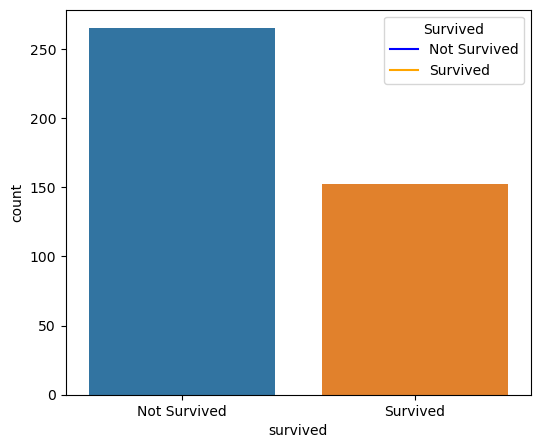

In [200]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'survived', data = df)

legends = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legends, ['Not Survived', 'Survived'], title = 'Survived')
plt.xticks([0,1], ['Not Survived', 'Survived'])

In [201]:
df['survived'].value_counts()

survived
0    265
1    152
Name: count, dtype: int64

Analysis:

Total number of people who survived = 152

Total number of people who did not survive = 265

* As we can see that our data is imbalanced. So, we need to balance our data. 

# Pclass

([<matplotlib.axis.XTick at 0x22b37619890>,
 [Text(0, 0, '1st Class'), Text(1, 0, '2nd Class'), Text(2, 0, '3rd Class')])

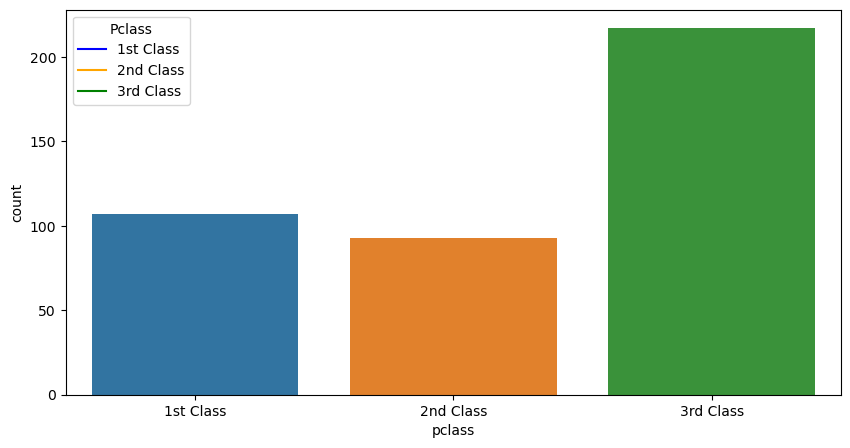

In [202]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'pclass', data = df)

legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange'), plt.Line2D([0], [0], color = 'green')]
plt.legend(legend_handles, ['1st Class', '2nd Class', '3rd Class'], title = 'Pclass')
plt.xticks([0,1,2], ['1st Class', '2nd Class', '3rd Class'])

In [203]:
df['pclass'].value_counts()

pclass
3    217
1    107
2     93
Name: count, dtype: int64

Analysis:
    
   * Most of the people are from class 3.
    
   * Less number of people are from class 2.

# Gender

([<matplotlib.axis.XTick at 0x22b37881410>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

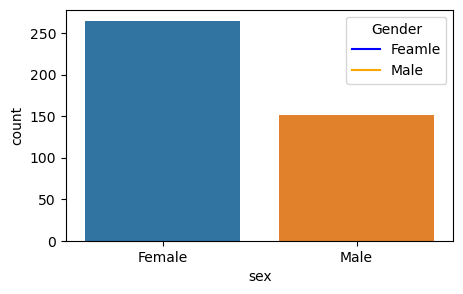

In [204]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'sex', data = df)

legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legend_handles, ['Feamle', 'Male'], title = 'Gender')
plt.xticks([0,1], ['Female', 'Male'])

In [205]:
df['sex'].value_counts()

sex
0    265
1    152
Name: count, dtype: int64

Analysis:
    
   * Most of the passengers in the dataset are females.

# Family Members

([<matplotlib.axis.XTick at 0x22b3790a310>,
 [Text(0, 0, '0 Member'),
  Text(1, 0, '1 Member'),
  Text(2, 0, '2 Members'),
  Text(3, 0, '3 Members'),
  Text(4, 0, '4 Members'),
  Text(5, 0, '5 Members'),
  Text(6, 0, '6 Members'),
  Text(7, 0, '7 Members'),
  Text(8, 0, '10 Members')])

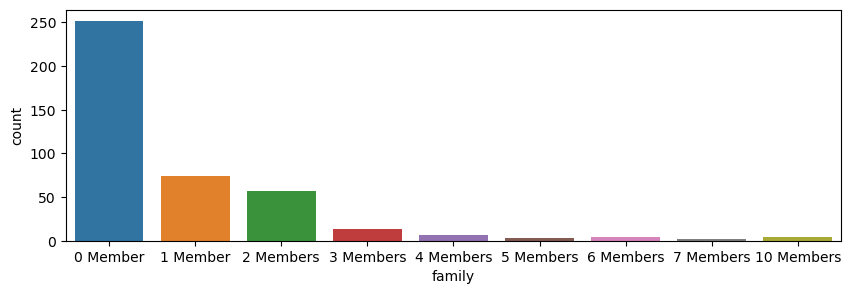

In [206]:
plt.figure(figsize = (10,3))
sns.countplot(x = 'family', data = df)

plt.xticks([0,1,2,3,4,5,6,7,8], ['0 Member', '1 Member', '2 Members', '3 Members', '4 Members', '5 Members', '6 Members', '7 Members', '10 Members'])

In [207]:
df['family'].value_counts()

family
0     252
1      74
2      57
3      14
4       7
6       4
10      4
5       3
7       2
Name: count, dtype: int64

Analysis:
    
   * Most of the passengers are single in the dataset.
    
   * Family of 7 is the least in the dataset.

# Embarked

([<matplotlib.axis.XTick at 0x22b3789c3d0>,
 [Text(0, 0, 'Cherbourg'),
  Text(1, 0, 'Queenstown'),
  Text(2, 0, 'Southampton')])

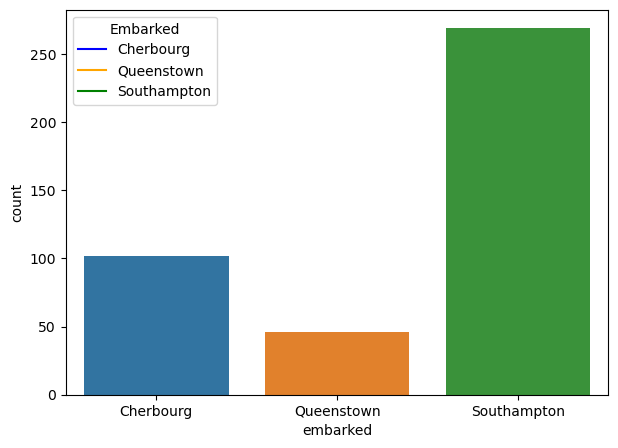

In [208]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'embarked', data = df)

legends = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange'), plt.Line2D([0], [0], color = 'green')]
plt.legend(legends, ['Cherbourg', 'Queenstown', 'Southampton'], title = 'Embarked')
plt.xticks([0,1,2], ['Cherbourg', 'Queenstown', 'Southampton'])

In [209]:
df['embarked'].value_counts()

embarked
2    269
0    102
1     46
Name: count, dtype: int64

Analysis:
    
   * Most of the passengers boarded from 'Sothampton'.
    
   * Less number of passengers boarded from 'Queenstown'.

# Age Group

Text(0.5, 1.0, 'Age Distribution')

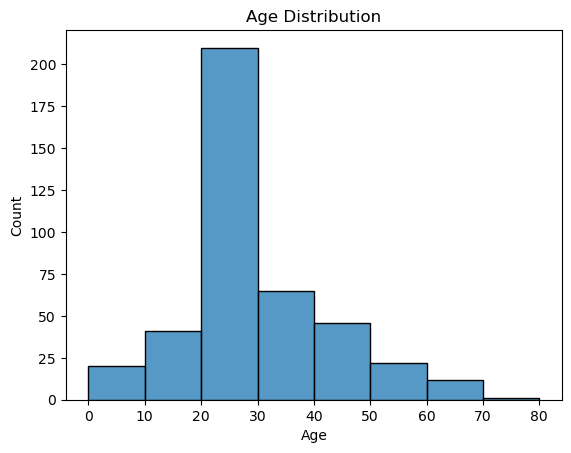

In [210]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a histogram with custom bins using Seaborn
sns.histplot(df['age'], bins = bin_edges, kde = False)

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

Analysis:
    
   * Most of the passengers are from the age group of 20 to 30.
    
   * Passengers of age group 70 to 80 are very less.

# * Bivariate Analysis

# Gender and Survived

([<matplotlib.axis.XTick at 0x22b37992450>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

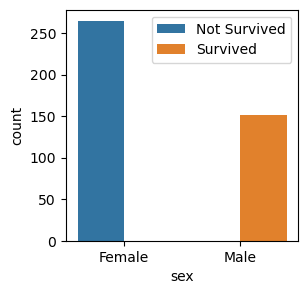

In [211]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'sex', data = df, hue = 'survived')

plt.legend(['Not Survived', 'Survived'])
plt.xticks([0,1], ['Female', 'Male'])

Analysis:
    
   * Most of the passengers who do not survive are females.

# Family and Survived

([<matplotlib.axis.XTick at 0x22b379db3d0>,
 [Text(0, 0, '0 Member'),
  Text(1, 0, '1 Member'),
  Text(2, 0, '2 Members'),
  Text(3, 0, '3 Members'),
  Text(4, 0, '4 Members'),
  Text(5, 0, '5 Members'),
  Text(6, 0, '6 Members'),
  Text(7, 0, '7 Members'),
  Text(8, 0, '10 Members')])

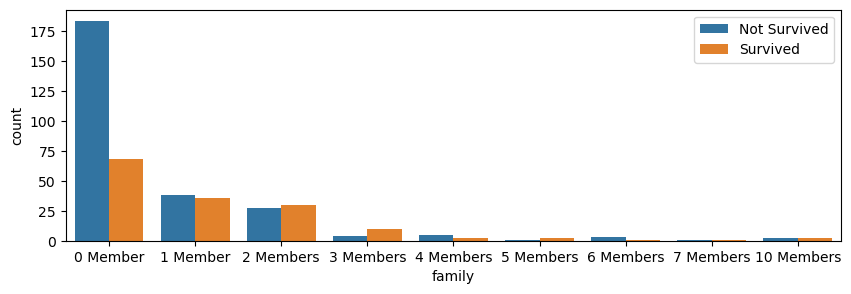

In [212]:
plt.figure(figsize = (10,3))
sns.countplot(x = 'family', data = df, hue = 'survived')

plt.legend(['Not Survived', 'Survived'])
plt.xticks([0,1,2,3,4,5,6,7,8], ['0 Member', '1 Member', '2 Members', '3 Members', '4 Members', '5 Members', '6 Members', '7 Members', '10 Members'])

Analysis:
    
   * Most of the single passengers did not survive.
    
   * Passengers with family mostly survived.

# Family and Embarked

([<matplotlib.axis.XTick at 0x22b37846150>,
 [Text(0, 0, 'Cherbourg'),
  Text(1, 0, 'Queenstown'),
  Text(2, 0, 'Southampton')])

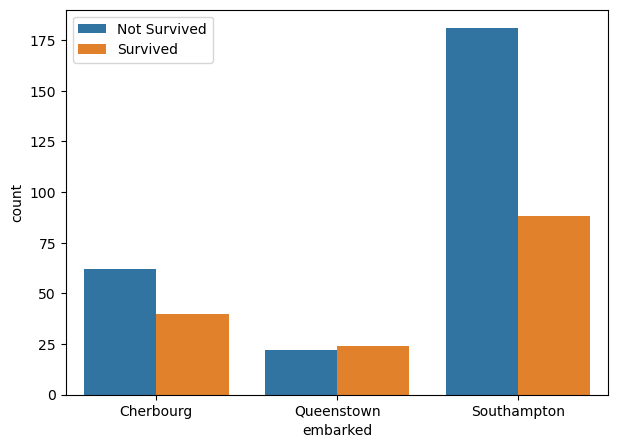

In [213]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'embarked', data = df, hue = 'survived')

plt.legend(['Not Survived', 'Survived'])
plt.xticks([0,1,2], ['Cherbourg', 'Queenstown', 'Southampton'])

Analysis:
    
   * Most of the passengers who did not survive were boarded from 'Southampton'.
   
   * Most of the passengers boarded from 'Cherbourg' did not survive.
    
   * Most of the passengers boarded from 'Queenstown' survived.

# 4. Data Preprocessing

In Data Preprocessing, we will perorm:
    
    1. Check for outliers
    2. Check correlation
    3. Split data in train and test
    4. Apply standard scaling
    5. Apply SOMTE on training data for data balancing

# Check Outliers:

In [214]:
df_new = df.copy(deep = True)

In [215]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [216]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df_new.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [217]:
for i in df_new.columns:
    out_remove(df_new,i)
    df_new.reset_index(drop=True,inplace = True)

sex ------- outliers not present
age ------- outliers present
family ------- outliers present
pclass ------- outliers not present
embarked ------- outliers not present
survived ------- outliers not present


In [218]:
df.shape

(417, 6)

In [219]:
df_new.shape

(351, 6)

* Here, we can see that there are some outliers in the 'Age' and 'Family' columns. 

* After removing the outliers, 66 rows were deleted.

* But, as we have a low amount of data and both the columns are important for modeling. We will not remove outliers.

# Check Correlation

<Axes: >

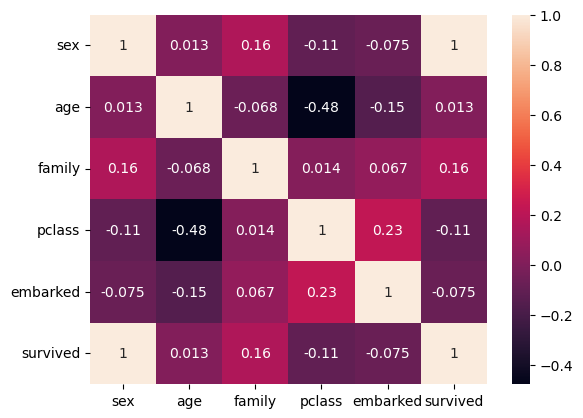

In [220]:
sns.heatmap(df.corr(), annot = True)

There is no such correlation between columns.

# Standard Scaling

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
scale = df.drop('survived', axis = 1)

In [223]:
ss = StandardScaler()

In [224]:
scaled_data = ss.fit_transform(scale)

In [225]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [226]:
scaled_df.head(3)

,sex,age,family,pclass,embarked
0,-0.757354,0.394417,-0.554309,0.875330,-0.468949
1,1.320387,1.385449,0.104229,0.875330,0.702020
2,-0.757354,2.574688,-0.554309,-0.313636,-0.468949


# Train Test Split

In [227]:
X = scaled_df
y = df['survived']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 104)

# Apply SMOTE for Data Balancing

In [229]:
from imblearn.over_sampling import SMOTE

In [230]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [234]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(412, 5)
(412,)


# 5. Model Building

# * Scorecard Function

In [235]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])

In [236]:
df_scorecard

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test


In [237]:
def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

# 1. Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

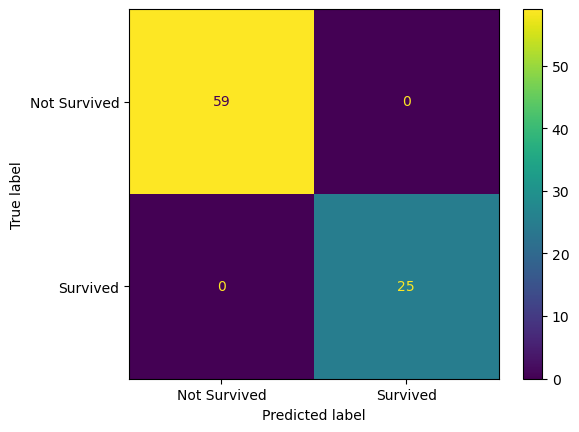

In [239]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
model_lr = lr.fit(X_train_resampled, y_train_resampled)
ypred_lr = model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train_resampled)
cm_lr = confusion_matrix(y_test, ypred_lr)
(ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = ['Not Survived', 'Survived'])).plot()

In [241]:
df101 = score_card(df_scorecard, 'Logistic Regression', ypred_lr, y_test, ypred_lr_train, y_train_resampled)
df101

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 2. Decision Tree Classifier: Entropy

In [242]:
from sklearn.tree import DecisionTreeClassifier

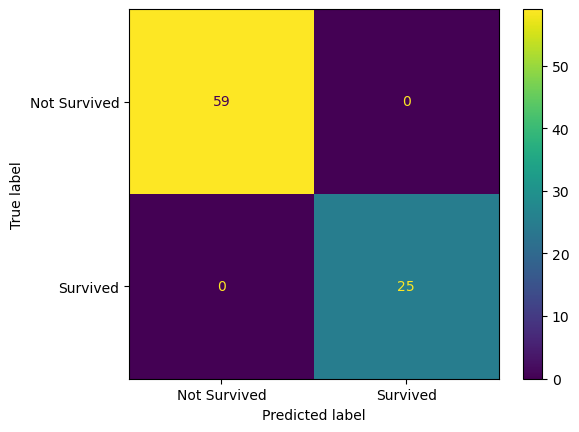

In [243]:
dtc_en = DecisionTreeClassifier(criterion = 'entropy')
model_en = dtc_en.fit(X_train_resampled, y_train_resampled)
ypred_en = model_en.predict(X_test)
ypred_en_train = model_en.predict(X_train_resampled)
cm_en = confusion_matrix(y_test, ypred_en)
(ConfusionMatrixDisplay(confusion_matrix = cm_en, display_labels = ['Not Survived', 'Survived'])).plot()

In [244]:
df102 = score_card(df101, 'Decision Tree: Entropy', ypred_en, y_test, ypred_en_train, y_train_resampled)
df102

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Decision Tree: Entropy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 3. Decision Tree: Gini

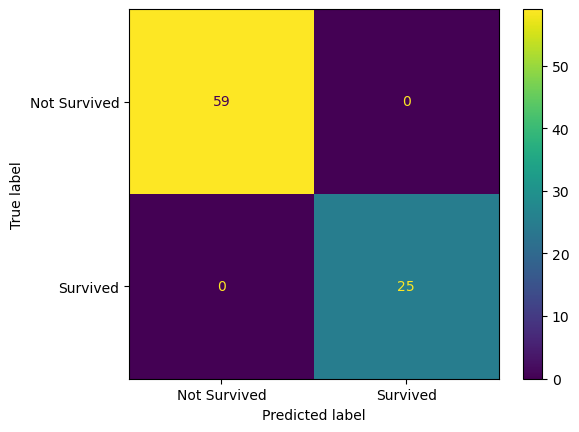

In [245]:
dtc_gn = DecisionTreeClassifier(criterion = 'gini')
model_gn = dtc_gn.fit(X_train_resampled, y_train_resampled)
ypred_gn = model_gn.predict(X_test)
ypred_gn_train = model_gn.predict(X_train_resampled)
cm_gn = confusion_matrix(y_test, ypred_gn)
(ConfusionMatrixDisplay(confusion_matrix = cm_gn, display_labels = ['Not Survived', 'Survived'])).plot()

In [246]:
df103 = score_card(df102, 'Decision Tree: Gini', ypred_gn, y_test, ypred_gn_train, y_train_resampled)
df103

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Decision Tree: Entropy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Decision Tree: Gini,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 4. Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

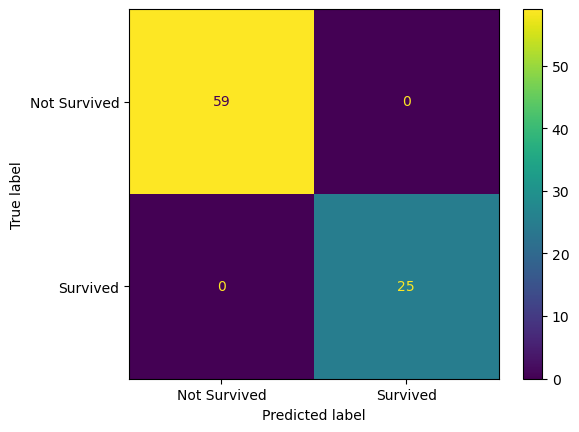

In [248]:
rf = RandomForestClassifier(n_estimators = 80, random_state = 102)
model_rf = rf.fit(X_train_resampled, y_train_resampled)
ypred_rf = model_rf.predict(X_test)
ypred_rf_train = model_rf.predict(X_train_resampled)
cm_rf = confusion_matrix(y_test, ypred_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['Not Survived', 'Survived'])).plot()

In [249]:
df104 = score_card(df103, 'Random Forest', ypred_rf, y_test, ypred_rf_train, y_train_resampled)
df104

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Decision Tree: Entropy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Decision Tree: Gini,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 5. Random Forest: GridSearchCV

In [250]:
from sklearn.model_selection import GridSearchCV as gscv

In [251]:
htmodel_rf = gscv(RandomForestClassifier(random_state = 104), param_grid = {'n_estimators': [50, 80, 100, 150, 200],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       'criterion' :['gini', 'entropy']}, cv = 5)

In [252]:
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50}


In [254]:
model_gscv_rf = RandomForestClassifier(criterion = htmodel_rf.best_params_.get('criterion'),
                                       n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features')).fit(X_train_resampled, y_train_resampled)

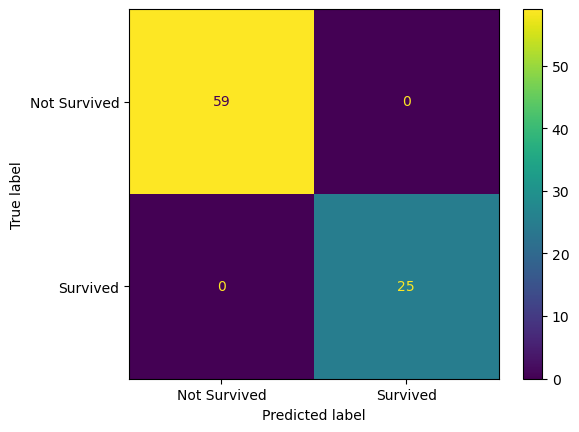

In [255]:
ypred_gscv_rf = model_gscv_rf.predict(X_test)
ypred_gscv_rf_train = model_gscv_rf.predict(X_train_resampled)
cm_gscv_rf = confusion_matrix(y_test, ypred_gscv_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_gscv_rf, display_labels = ['Not Survived', 'Survived'])).plot()

In [256]:
df105 = score_card(df104, 'Random Forest: GridSearchCV', ypred_gscv_rf, y_test, ypred_gscv_rf_train, y_train_resampled) 
df105

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Decision Tree: Entropy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Decision Tree: Gini,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Random Forest: GridSearchCV,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 6. KNeighbors Classifier

In [257]:
from sklearn.neighbors import KNeighborsClassifier

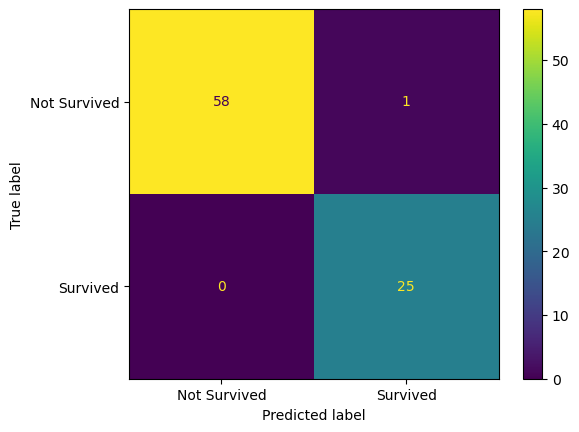

In [258]:
knc = KNeighborsClassifier()
model_knc = knc.fit(X_train_resampled, y_train_resampled)
ypred_knc = model_knc.predict(X_test)
ypred_knc_train = model_knc.predict(X_train_resampled)
cm_knc = confusion_matrix(y_test, ypred_knc)
(ConfusionMatrixDisplay(confusion_matrix = cm_knc, display_labels = ['Not Survived', 'Survived'])).plot()

In [259]:
df106 = score_card(df105, 'KNeighbors Classifier', ypred_knc, y_test, ypred_knc_train, y_train_resampled)
df106

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923


# 7. Bagging Classifier

In [260]:
from sklearn.ensemble import BaggingClassifier

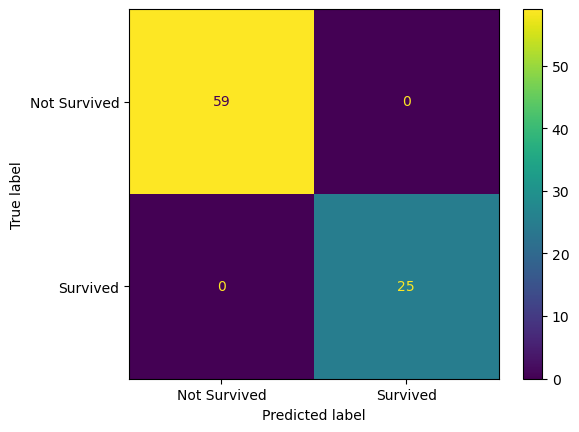

In [261]:
bg = BaggingClassifier(n_estimators = 80, random_state = 102)
model_bg = bg.fit(X_train_resampled, y_train_resampled)
ypred_bg = model_bg.predict(X_test)
ypred_bg_train = model_bg.predict(X_train_resampled)
cm_bg = confusion_matrix(y_test, ypred_bg)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg, display_labels = ['Not Survived', 'Survived'])).plot()

In [263]:
df107 = score_card(df106, 'Bagging Classifier', ypred_bg, y_test, ypred_bg_train, y_train_resampled)
df107

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923
6,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 8. SVM

In [264]:
from sklearn.svm import SVC

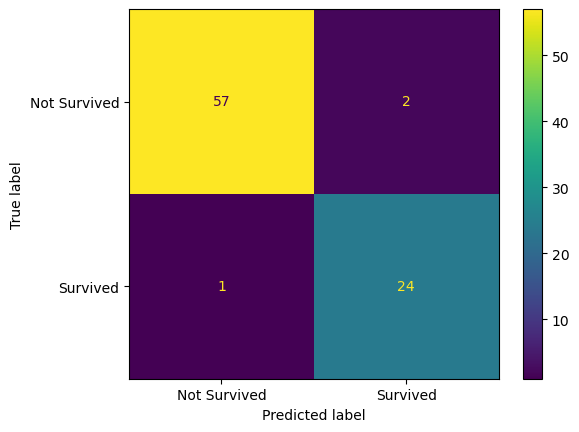

In [266]:
svm = SVC(kernel = 'sigmoid')
model_svm = svm.fit(X_train_resampled, y_train_resampled)
ypred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train_resampled)
cm_svm = confusion_matrix(y_test, ypred_svm)
(ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Not Survived', 'Survived'])).plot()

In [267]:
df108 = score_card(df107, 'SVM', ypred_svm, y_test, ypred_svm_train, y_train_resampled)
df108

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923
6,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,SVM,0.956311,0.956698,0.956311,0.956301,0.964286,0.952918,0.963051,0.957768


# 9. AdaBoost Classifier

In [268]:
from sklearn.ensemble import AdaBoostClassifier

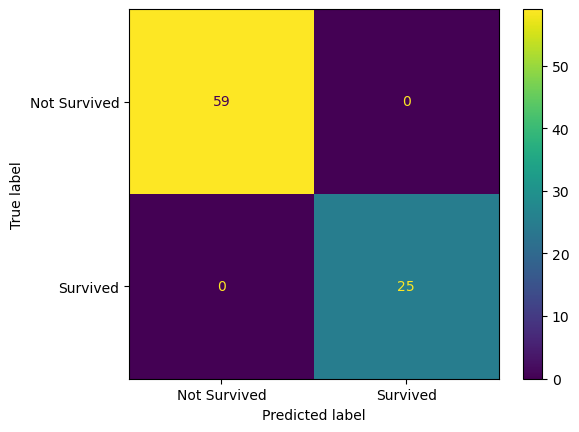

In [269]:
ab = AdaBoostClassifier(n_estimators = 80, random_state = 102)
model_ab = ab.fit(X_train_resampled, y_train_resampled)
ypred_ab = model_ab.predict(X_test)
ypred_ab_train = model_ab.predict(X_train_resampled)
cm_ab = confusion_matrix(y_test, ypred_ab)
(ConfusionMatrixDisplay(confusion_matrix = cm_ab, display_labels = ['Not Survived', 'Survived'])).plot()

In [271]:
df109 = score_card(df108, 'AdaBoost Classifier', ypred_ab, y_test, ypred_ab_train, y_train_resampled)
df109

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923
6,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,SVM,0.956311,0.956698,0.956311,0.956301,0.964286,0.952918,0.963051,0.957768
8,AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 10. XGBoost Classifier

In [272]:
!pip install xgboost

In [273]:
import xgboost
from xgboost import XGBClassifier

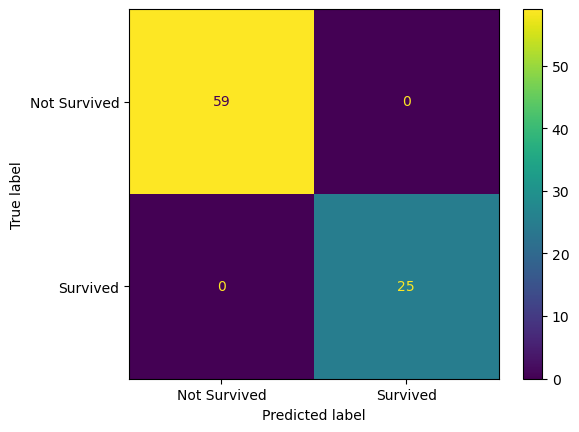

In [275]:
xgb = XGBClassifier(n_estimators = 80, random_state = 102)
model_xgb = xgb.fit(X_train_resampled, y_train_resampled)
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb_train = model_xgb.predict(X_train_resampled)
cm_xgb = confusion_matrix(y_test, ypred_xgb)
(ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Not Survived', 'Survived'])).plot()

In [276]:
df110 = score_card(df109, 'XGBoost Classifier', ypred_xgb, y_test, ypred_xgb_train, y_train_resampled)
df110

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923
6,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,SVM,0.956311,0.956698,0.956311,0.956301,0.964286,0.952918,0.963051,0.957768
8,AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 11. Naive Bayes: Binomial

In [277]:
from sklearn.naive_bayes import BernoulliNB

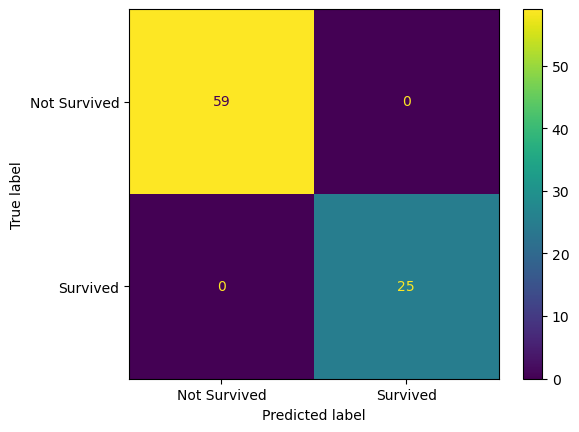

In [278]:
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train_resampled, y_train_resampled)
ypred_bnb = model_bnb.predict(X_test)
ypred_bnb_train = model_bnb.predict(X_train_resampled)
cm_bnb = confusion_matrix(y_test, ypred_bnb)
(ConfusionMatrixDisplay(confusion_matrix = cm_bnb, display_labels = ['Not Survived', 'Survived'])).plot()

In [280]:
df111 = score_card(df110, 'Naive Bayes: Bernoulli', ypred_bnb, y_test, ypred_bnb_train, y_train_resampled)
df111

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree: Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree: Gini,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest: GridSearchCV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,KNeighbors Classifier,0.997573,0.997585,0.997573,0.997573,0.988095,0.980769,0.991525,0.985923
6,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,SVM,0.956311,0.956698,0.956311,0.956301,0.964286,0.952918,0.963051,0.957768
8,AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check the results of trained model

We will check with XGBoost Model, because of its high performance.

In [281]:
df

,sex,age,family,pclass,embarked,survived
0,0,34.5,0,3,1,0
1,1,47.0,1,3,2,1
2,0,62.0,0,2,1,0
3,0,27.0,0,3,2,0
4,1,22.0,2,3,2,1
...,...,...,...,...,...,...
413,0,27.0,0,3,2,0
414,1,39.0,0,1,0,1
415,0,38.5,0,3,2,0
416,0,27.0,0,3,2,0


In [287]:
# Give input as an array
array = np.array([0, 27, 2, 3, 0])

# Perform standard sclaer
scaled = ss.transform(array.reshape(1,-1))

# Convert an array to dataframe
sc_df = pd.DataFrame(scaled.reshape(1,5), columns = scale.columns)
sc_df

# Prediction
ypred = model_xgb.predict(sc_df)

if ypred == 0:
    print('Prediction is: {}'.format(ypred))
    print('Passenger did not survived')
else:
    print('Prediction is: {}'.format(ypred))
    print('Passenger Survived')

Prediction is: [0]
Passenger did not survived


# Conclusion: 

In our Titanic Survival Prediction analysis, we discovered that only 36.4% of passengers survived. Survival rates varied by passenger class, gender, and age. Factors like family members and embarkation location also influence survival. We trained several classification models and all performed well, likely because of the dataset's modest size.